# Week 1

## What is Machine Learning?

Definition by Arthur Samuel

> Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.

Definition by Tom Mitchell

> A computer program is said to learn from experience E with respect to some class of tasks T and performance
> measure P, if its performance at tasks in T, as measured by P, improves with experience E.

In general, any ML problem can be assigned to one of two broad classifications: 
- Supervised learning
- Unsupervised learning

### Supervised Learning

In supervised learning, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and output.

Supervised learning problems are categorized into:
- Regression problems (continuous output)
- Classification problems (discrete output)

### Unsupervised Learning

In unsupervised learning, we approach the problems with little or no idea what our results should look like.

## Linear Regression with One Variable

Also known as _univariate_ linear regression.

Predict a single (continuous) output value y, from a single input value x.

### The Hypothesis Function

$$\hat{y} = h_\theta(x) = \theta_0 + \theta_1x$$

Note that this is like the equation of a straight line. 

_Noob Intuition: $\theta_1$ is kind of the "weight" for how much of x influences y. $\theta_0$ is then the weight of some "base" value which is always present._

#### Example

Given the data

| input x | output y |
|---------|----------|
| 0       | 4        |
| 1       | 7        |
| 2       | 7        |
| 3       | 8        |

We can make a random guess $\theta_0 = 2$ and $\theta_1 = 2$. The hypothesis then becomes $h_\theta(x) = 2 + 2x$.

For input 1 to our hypothesis, y will be 4. Ths is off by 3.

In [199]:
data = [ 0 4; 1 7; 2 7; 3 8];
theta = [ 2 2 ];

function py = h(theta, x)
    py = theta(1) + theta(2) * x;
end

h(theta, 1)

ans =  4


We will be trying out different values for $\theta_0$ and $\theta_1$ to try to find values which provides the best possible "fit", or the most representative "straight line" through the data points mapped on the x-y plane.

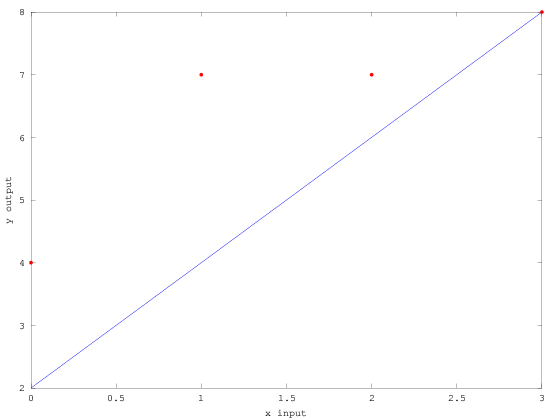

In [200]:
x = data(:, 1);
y = data(:, 2);
plot(x, y, "r.", "markersize", 10);
hold on;
plot(x, h(theta, x));
xlabel("x input");
ylabel("y output");
hold off;

### Cost Function

We can measure the accuracy of our hypothesis function using a *cost function*. This take an (fancy) average of all results of the hypothesis with inputs from x's compared to the actual output y's.

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x_i) - y_i )^2$$

This function is otherwise called the *squared error function* or *mean squared error*. The mean is halved ($\frac{1}{2m}$) as a convenience for the computation of the gradient descent (as the derivative term will cancel out the $\frac{1}{2}$ term).

Now we can measure the accuracy of our predictor function.

In visual terms: the training data is scattered on the x-y plane. We are trying to make a straight line which passes through the data. The best line would be such that the averaged squared vertical distances of the scattered points from the line will be the least. Thus the best case is $J(\theta_0, \theta_1)=0$, in which case the line pass through all data points.

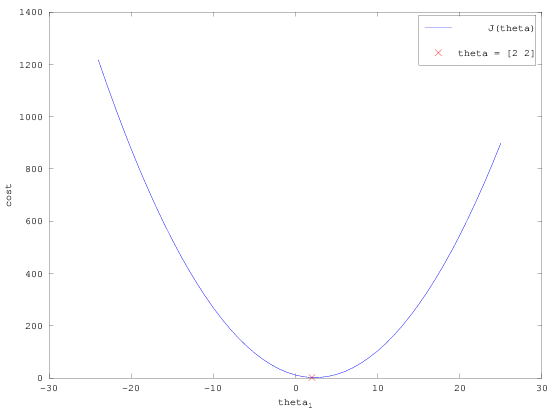

In [165]:
function cost = J(theta, x, y)
    m = length(y);
    cost = sum((h(theta, x) - y).^2) / (2 * m);
end

tmp = zeros(50, 2);
for i = 1:50
    tmp(i, :) = [i - 25, J([2, i - 25], x, y)];
end

plot(tmp(:, 1), tmp(:, 2), ";J(theta);");
xlabel("theta_1");
ylabel("cost");
hold on;
plot(theta(1), J(theta, x, y), "rx;theta = [2 2];");
hold off;

## Gradient Descent

Looking at the graph of the cost function above, we can see that it is shaped like a bowl (it's *convex*). Our goal is to get to the bottom of the function, that is *minimize* $J(\theta_0, \theta_1)$.

The way we move towards the bottom is taking the derivative, which gives us the slope of the (tangent of the) function at that point. Then we uses that slope and a learning rate $\alpha$ to walk towards the bottom.

We need to repeat the following until *convergence*:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1)$$

Intuitively this can be thought of:

$$\theta_j := \theta_j - \alpha [\text{slope}][\text{slope}]$$

### Gradient Descent for Linear Regression

For linear regression we can derive a new form of the equation (substituting the actual cost function and hypothesis function and modifying the equation):

Repeat until convergence:
$$
\begin{align}
    \theta_0 & := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i) \\
    \theta_1 & := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} ((h_\theta(x_i) - y_i)x_i)
\end{align}
$$

_Go read calculus to understand the derivation._

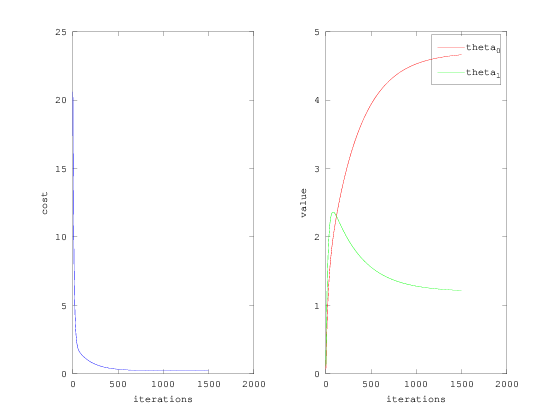

In [246]:
function [theta, theta_history, J_history] = gradientDescent(theta, x, y, alpha, iterations)
    m = length(y);
    theta_history = zeros(iterations, 2);
    J_history = zeros(iterations, 1);
    for i = 1:iterations
        theta_0 = theta(1) - (alpha / m) * sum(h(theta, x) - y);
        theta_1 = theta(2) - (alpha / m) * sum((h(theta, x) - y) .* x);
        theta = [ theta_0, theta_1 ];
        theta_history(i, :) = theta;
        J_history(i) = J(theta, x, y);
    end
end

iterations = 1500;
alpha = 0.01;
[theta, theta_history, J_history] = gradientDescent([0, 0], x, y, alpha, iterations);

subplot(1, 2, 1);
plot(1:iterations, J_history);
xlabel("iterations");
ylabel("cost");

subplot(1, 2, 2);
plot(1:iterations, theta_history(:, 1), 'r;theta_0;');
hold on;
plot(1:iterations, theta_history(:, 2), 'g;theta_1;');
hold off;
xlabel("iterations");
ylabel("value");

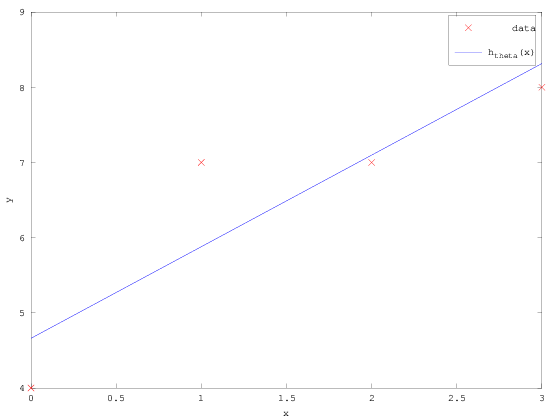

In [256]:
plot(x, y, 'rx;data;');
hold on;
plot(x, h(theta, x, y), ";h_{theta}(x);");
xlabel("x");
ylabel("y");